              
## Air Quality Analysis

### Problem Description

Air pollution is perceived as a modern-day curse: a by-product of increasing urbanization and industrialization. It does, however, have a long and evolving history with interesting transitions in line with economic, technological and political change. This entry presents a global-level overview of air pollution: trends in emissions from historical through to the present day, the health and mortality burden and risk from air pollution, and discussion of some of the key correlations and determinants of the severity of pollution and its impacts.

                
### Competition Description
           
All of this data comes from EPA’s Air Quality System (AQS). Data collection agencies report their data to EPA via this system and it calculates several types of aggregate (summary) data for EPA internal use. This includes daily and annual summaries, but not monthly summaries, as these are not routinely needed by EPA. 

    In this challenge, we ask you to do the following tasks.
1.Ingest the data into a format that is easy for analysis.<br>
2.Perform Exploratory Data Analysis on the dataset.<br>
3.Perform clustering on the dataset to group data based on air quality.

## Load the data

The data has been split into train_data, test_data and can be loaded with read_csv command


In [168]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Reading the data from csv file
dataframe = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/8hour_42101_2017_10K.csv')


#showing the data.
dataframe.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Sample Duration,Pollutant Standard,Units of Measure,Observation Count,Observations with Events,Null Observations,Mean Including All Data,Mean Excluding All Flagged Data,Mean Excluding Concurred Flags,Date of Last Change
0,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,6,0,0,0.1,0.1,0.1,2017-04-19
1,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,7,0,0,0.2,0.2,0.2,2017-04-19
2,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.2,0.2,0.2,2017-04-19
3,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.2,0.2,0.2,2017-04-19
4,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.3,0.3,0.3,2017-04-19


#hint : directly execute the code to load the data


In [122]:
if True:
        print('continue')
else:
        print('The answer did not pass the test.')

continue


## Air Quality Analysis - Data Selection & Preparation

Prior to fitting a clustering model for clustering based on air quality.
 who would likely survive, we have to examine the dataset with information from EDA as well as using other statistical methods. The logistic regression algorithm is also a supervised learning technique.

The dataset has data that cannot be directly used due to many issues including but not limited to:

Sparse column entries in certain columns such as Cabin. NaN entries in columns. Categorical variables with string entries. Selection of right columns. Sparsity Let us examine sparse columns by counting the ratio of NaNs to all the values. describe() function on dataframe provides information about mean, median and the number of values ignoring NaNs only for float/integer columns.
 
    
### Sparsity in the dataset.

Let us analyze the sparsity in the columns of the dataset. This will give us an insight into what feature engineering needs to be done to resolve the sparsity.

In [169]:
raw_features = dataframe.columns

for feature in raw_features:
    content_prop = len(dataframe[dataframe[feature].notnull() == True].index)/len(dataframe.index)
    print(feature, content_prop)

State Code 1.0
County Code 1.0
Site Num 1.0
Parameter Code 1.0
POC 1.0
Latitude 1.0
Longitude 1.0
Datum 1.0
Parameter Name 1.0
Date Local 1.0
Time Local 1.0
Date GMT 1.0
Time GMT 1.0
Sample Duration 1.0
Pollutant Standard 1.0
Units of Measure 1.0
Observation Count 1.0
Observations with Events 1.0
Null Observations 1.0
Mean Including All Data 1.0
Mean Excluding All Flagged Data 1.0
Mean Excluding Concurred Flags 1.0
Date of Last Change 1.0


#Hint:  Execute the code to find the sparsity

In [124]:
if True:
        print('continue')
else:
        print('The answer did not pass the test.')

continue


## Monitor
For the purposes of AQS, a monitor does not refer to a specific piece of equipment. Instead, it reflects that a given pollutant (or other parameter) is being measured at a given site.

Identified by:
The site (state + county + site number) where the monitor is located AND

The pollutant code AND

POC – Parameter Occurrence Code. Used to uniquely identify a monitor if there is more than one device measuring the same pollutant at the same site.

For example monitor IDs are usually written in the following way:
SS-CCC-NNNN-PPPPP-Q
where SS is the State FIPS code, CCC is the County FIPS code, and NNNN is the Site Number within the county (leading zeroes are always included for these fields), PPPPP is the AQS 5-digit parameter code, and Q is the POC. For example:
01-089-0014-44201-2
is Alabama, Madison County, Site Number 14, ozone monitor, POC 2.


We are loading an empty dataset and adding column MonitorId to that.



In [170]:
data=pd.read_csv('https://raw.githubusercontent.com/prathyushapatel/DataScience/master/Data.csv')
data["Monitor_id"] = dataframe["State Code"].map(str)+"-"+ dataframe["County Code"].map(str)+"-"+ dataframe["Site Num"].map(str)+"-"+ dataframe["Parameter Code"].map(str)+"-"+ dataframe["POC"].map(str)
print(data)

             Monitor_id
0       1-73-23-42101-2
1       1-73-23-42101-2
2       1-73-23-42101-2
3       1-73-23-42101-2
4       1-73-23-42101-2
5       1-73-23-42101-2
6       1-73-23-42101-2
7       1-73-23-42101-2
8       1-73-23-42101-2
9       1-73-23-42101-2
10      1-73-23-42101-2
11      1-73-23-42101-2
12      1-73-23-42101-2
13      1-73-23-42101-2
14      1-73-23-42101-2
15      1-73-23-42101-2
16      1-73-23-42101-2
17      1-73-23-42101-2
18      1-73-23-42101-2
19      1-73-23-42101-2
20      1-73-23-42101-2
21      1-73-23-42101-2
22      1-73-23-42101-2
23      1-73-23-42101-2
24      1-73-23-42101-2
25      1-73-23-42101-2
26      1-73-23-42101-2
27      1-73-23-42101-2
28      1-73-23-42101-2
29      1-73-23-42101-2
...                 ...
9969  1-73-2059-42101-1
9970  1-73-2059-42101-1
9971  1-73-2059-42101-1
9972  1-73-2059-42101-1
9973  1-73-2059-42101-1
9974  1-73-2059-42101-1
9975  1-73-2059-42101-1
9976  1-73-2059-42101-1
9977  1-73-2059-42101-1
9978  1-73-2059-

#hint: execute it

In [126]:
if True:
        print('continue')
else:
        print('The answer did not pass the test.')

continue


## 1.Ingesting the data into a format that is easy for analysis.

In [171]:
data["Latitude"] = dataframe["Latitude"]
data["Longitude"] = dataframe["Longitude"]
def person_type(x):
  if (x == 33.553056):
    return 'Hyderabad'
  elif x == 33.485555999999995:
    return 'Bangalore'
  elif x == 33.521427:
    return 'Kurnool'
  else:
    return 'U'
data['Place'] = dataframe['Latitude'].apply(person_type)

data["Datum"] = dataframe["Datum"].map(str)
data["Parameter Name"] = dataframe["Parameter Name"].map(str)
data["Date Local"] = dataframe["Date Local"].map(str)
data["Time Local"] = dataframe["Time Local"].map(str)
data["Date GMT"] = dataframe["Date GMT"].map(str)
data["Time GMT"] = dataframe["Time GMT"].map(str)
data["Sample Duration"] = dataframe["Sample Duration"].map(str)
data["Pollutant Standard"] = dataframe["Pollutant Standard"].map(str)
data["Units of Measure"] = dataframe["Units of Measure"].map(str)
data["Observation Count"] = dataframe["Observation Count"].map(str)
data["Observations with Events"] = dataframe["Observations with Events"]
data["Null Observations"] = dataframe["Null Observations"]
data["Mean Including All Data"] = dataframe["Mean Including All Data"]
data["Mean Excluding All Flagged Data"] = dataframe["Mean Excluding All Flagged Data"]
data["Mean Excluding Concurred Flags"] = dataframe["Mean Excluding Concurred Flags"]
data["Date of Last Change"] = dataframe["Date of Last Change"].map(str)

print(data)

SyntaxError: invalid syntax (<ipython-input-171-1a9216ac9478>, line 26)

Execute it

In [128]:
if True:
        print('continue')
else:
        print('The answer did not pass the test.')

continue


## Perform Exploratory Data Analysis on the dataset.

In [172]:
plt.bar(data['Latitude'],data['Mean Excluding All Flagged Data'],align='center', alpha=0.5)
plt.yticks(rotation='horizontal')
#plt.xticks(np.arange(0, 100, 10))
plt.xticks(rotation='vertical')

KeyError: 'Latitude'

hint:execute 

In [ ]:
if True:
        print('continue')
else:
        print('The answer did not pass the test.')

## latitude vs mean excluding concurred flags

In [173]:
plt.bar(data['Latitude'],data['Mean Excluding Concurred Flags'], align='center',         alpha=0.5)
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')
plt.show()

KeyError: 'Latitude'

hint:execute

In [ ]:
if True:
        print('continue')
else:
        print('The answer did not pass the test.')

## graph latitude vs mean including all data

In [ ]:

plt.bar(data['Latitude'],data['Mean Including All Data'], align='center',         alpha=0.5)
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')
plt.show()


hint:execute

In [ ]:
if True:
        print('continue')
else:
        print('The answer did not pass the test.')

## Perform clustering on the dataset to group data based on air quality
Why clustering?

Given a collection of text documents, we want to organize them according to their content similarities, – To produce a topic hierarchy
 • In fact, clustering is one of the most utilized data mining techniques.
clustering with unsupervised learning

K-Means

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

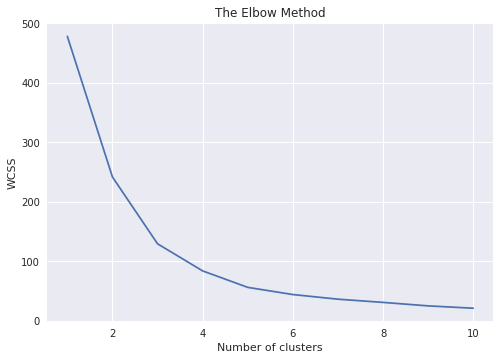

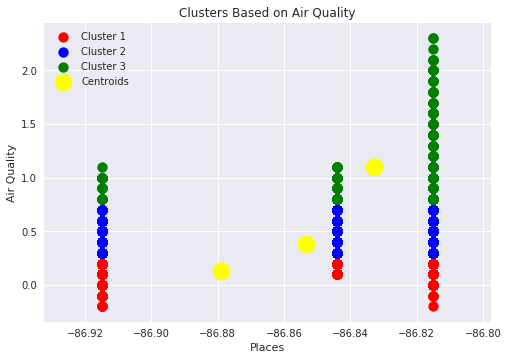

In [155]:


# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



def person_type(x):
  if (x == 33.553056):
    return 'Hyderabad'
  elif x == 33.485555999999995:
    return 'Bangalore'
  elif x == 33.521427:
    return 'Kurnool'
  else:
    return 'U'
data['Place'] = dataframe['Latitude'].apply(person_type)


X = data.iloc[:,[ 1, 16]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
16,17,18

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Based on Air Quality')
plt.xlabel('Latitude')
plt.ylabel('Air Quality')
plt.legend()
plt.show()

hint: execute it

In [ ]:
if True:
        print('continue')
else:
        print('The answer did not pass the test.')

## Clustering between longitude vs air quality

In [174]:


# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



def person_type(x):
  if (x == 33.553056):
    return 'Hyderabad'
  elif x == 33.485555999999995:
    return 'Bangalore'
  elif x == 33.521427:
    return 'Kurnool'
  else:
    return 'U'
data['Place'] = dataframe['Latitude'].apply(person_type)


X = data.iloc[:,[ 2, 16]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
16,17,18

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Based on Air Quality')
plt.xlabel('Longitude')
plt.ylabel('Air Quality')
plt.legend()
plt.show()

IndexError: positional indexers are out-of-bounds

hint:execute this